In [1]:
import math

import numpy as np
import matplotlib.pyplot as plt
import glob
import os

import pandas as pd
import xarray as xr
from datetime import datetime, timedelta

import json

%matplotlib notebook

## Import measures

In [5]:
meas_folder = r"C:\Users\leroquan\Documents\00-Work_space\13-Geneva MITgcm calibration\Weather forcing analysis - Geneva Lexplore\Lexplore weather data"
meas_nc_files = glob.glob(os.path.join(meas_folder, f'*.nc'))

In [6]:
ds_meas = xr.open_mfdataset(meas_nc_files, combine="by_coords", engine='netcdf4')

In [7]:
ds_meas['AirTC'].plot()
plt.show()

<IPython.core.display.Javascript object>

In [8]:
puy_json_path = r"C:\Users\leroquan\Documents\00-Work_space\13-Geneva MITgcm calibration\Weather forcing analysis - Geneva Lexplore\Pully weather data\puy_from_alplakes.json"

In [9]:
with open(puy_json_path, 'r') as file:
    puy_data = json.load(file)

In [10]:
puy_time = np.array([np.datetime64(time, 'ns') for time in puy_data['time']])

C:\Users\leroquan\AppData\Local\Temp\ipykernel_32040\3477373665.py:1: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  puy_time = np.array([np.datetime64(time, 'ns') for time in puy_data['time']])


## Cosmo

In [11]:
cosmo_folder = r"C:\Users\leroquan\Documents\00-Work_space\13-Geneva MITgcm calibration\Weather forcing analysis - Geneva Lexplore\cosmo"

In [12]:
cosmo_temp_path = os.path.join(cosmo_folder, 'atemp.bin')
with open(cosmo_temp_path, 'rb') as fid:
    cosmo_data_temp = np.fromfile(fid, dtype='>f8')

In [13]:
nx = 1344 / 4
ny = 528 / 4
nt = len(cosmo_data_temp) / nx /ny

print(f'nx = {nx}, ny= {ny}, nt = {nt}' )

nx = 336.0, ny= 132.0, nt = 2952.0


In [14]:
start_date = np.datetime64('2024-04-01T00:00:00', 'ns')

date_list = np.array([start_date + np.timedelta64(i, 'h') for i in range(int(nt))])

In [15]:
m_lexplore = 49850 / 200
n_lexplore = 18100 / 200

## ICON

In [16]:
icon_folder = r"C:\Users\leroquan\Documents\00-Work_space\13-Geneva MITgcm calibration\Weather forcing analysis - Geneva Lexplore\icon"

In [17]:
icon_temp_path = os.path.join(icon_folder, 'atemp.bin')
with open(icon_temp_path, 'rb') as fid:
    icon_data_temp = np.fromfile(fid, dtype='>f8')

In [18]:
nt_icon=len(icon_data_temp)/ nx /ny

In [19]:
start_date_icon = np.datetime64('2024-08-01T00:00:00', 'ns')
date_list_icon = np.array([start_date_icon + np.timedelta64(i, 'h') for i in range(int(nt_icon))])

## Temperature

In [20]:
cosmo_array = np.reshape(cosmo_data_temp, (int(nt),int(ny),int(nx)))

In [21]:
icon_array = np.reshape(icon_data_temp, (int(nt_icon),int(ny),int(nx)))

In [22]:
puy_temp = puy_data['variables']['air_temperature']['data']

In [23]:
i_time = -1
fig = plt.figure(figsize=(15,8))
plt.scatter(m_lexplore, n_lexplore, marker='x', color='black')
plt.imshow(cosmo_array[i_time,:,:]-273.15, vmin=6)
plt.gca().invert_yaxis()
plt.title(date_list[i_time])
plt.colorbar()

<IPython.core.display.Javascript object>

In [25]:
# Léxplore
start_plot = np.datetime64('2024-01-01T00:00:00', 'ns')
end_plot = np.datetime64('2025-01-01T00:00:00', 'ns')

plt.figure(figsize=(15,8))
ds_meas['AirTC'].plot(label="Measure LéXPLORE", color='r')
plt.plot(puy_time, puy_temp, label='Measure Pully', color='darkred')
plt.plot(date_list, cosmo_array[:,int(n_lexplore), int(m_lexplore)]-273.15, label='Cosmo LéXPLORE', color='b')
plt.plot(date_list_icon, icon_array[:,int(n_lexplore), int(m_lexplore)]-273.15, label='Icon LéXPLORE', color='g')
plt.xlim(left = start_plot, right = end_plot)
plt.legend()
plt.show()

<IPython.core.display.Javascript object>

# Radiation

In [26]:
cosmo_sw_path = os.path.join(cosmo_folder, 'swdown.bin')
with open(cosmo_sw_path, 'rb') as fid:
    cosmo_data_sw = np.fromfile(fid, dtype='>f8')
    
cosmo_data_sw = np.reshape(cosmo_data_sw, (int(nt),int(ny),int(nx)))

In [27]:
icon_sw_path = os.path.join(icon_folder, 'swdown.bin')
with open(icon_sw_path, 'rb') as fid:
    icon_data_sw = np.fromfile(fid, dtype='>f8')
    
icon_data_sw = np.reshape(icon_data_sw, (int(nt_icon),int(ny),int(nx)))

In [28]:
puy_rad = puy_data['variables']['global_radiation']['data']

In [29]:
i_time = 12
fig = plt.figure(figsize=(15,8))
plt.scatter(m_lexplore, n_lexplore, marker='x', color='black')
plt.imshow(cosmo_data_sw[i_time,:,:])
plt.gca().invert_yaxis()
plt.title(date_list[i_time])
plt.colorbar()

<IPython.core.display.Javascript object>

In [30]:
# Léxplore
start_plot = np.datetime64('2024-01-15T00:00:00', 'ns')
end_plot = np.datetime64('2025-01-01T00:00:00', 'ns')

plt.figure(figsize=(15,8))
ds_meas['Slrw'].plot(label="Measure LéXPLORE", color='r')
plt.plot(puy_time, puy_rad, label='Measure Pully', color='darkred')
plt.plot(date_list, cosmo_data_sw[:,int(n_lexplore), int(m_lexplore)], label='Cosmo LéXPLORE')
plt.plot(date_list_icon, icon_data_sw[:,int(n_lexplore), int(m_lexplore)], label='Icon LéXPLORE')
plt.xlim(left = start_plot, right = end_plot)
plt.legend()

<IPython.core.display.Javascript object>

## Wind speed

In [31]:
cosmo_u10_path = os.path.join(cosmo_folder, 'u10.bin')
with open(cosmo_u10_path, 'rb') as fid:
    cosmo_data_u10 = np.fromfile(fid, dtype='>f8')
    
cosmo_data_u10 = np.reshape(cosmo_data_u10, (int(nt),int(ny),int(nx)))

In [32]:
cosmo_v10_path = os.path.join(cosmo_folder, 'v10.bin')
with open(cosmo_v10_path, 'rb') as fid:
    cosmo_data_v10 = np.fromfile(fid, dtype='>f8')
    
cosmo_data_v10 = np.reshape(cosmo_data_v10, (int(nt),int(ny),int(nx)))

In [33]:
cosmo_data_ws = np.sqrt(cosmo_data_u10**2 + cosmo_data_v10**2)

In [38]:
icon_u10_path = os.path.join(icon_folder, 'u10.bin')
with open(icon_u10_path, 'rb') as fid:
    icon_data_u10 = np.fromfile(fid, dtype='>f8')
    
icon_data_u10 = np.reshape(icon_data_u10, (int(nt_icon),int(ny),int(nx)))

In [39]:
icon_v10_path = os.path.join(icon_folder, 'v10.bin')
with open(icon_v10_path, 'rb') as fid:
    icon_data_v10 = np.fromfile(fid, dtype='>f8')
    
icon_data_v10 = np.reshape(icon_data_v10, (int(nt_icon),int(ny),int(nx)))

In [40]:
icon_data_ws = np.sqrt(icon_data_u10**2 + icon_data_v10**2)

In [34]:
puy_ws = puy_data['variables']['wind_speed']['data']
puy_wd = puy_data['variables']['wind_direction']['data']

In [35]:
i_time = 10
fig = plt.figure(figsize=(15,8))
plt.scatter(m_lexplore, n_lexplore, marker='x', color='black')
plt.imshow(cosmo_data_ws[i_time,:,:])
plt.gca().invert_yaxis()
plt.title(date_list[i_time])
plt.colorbar()

<IPython.core.display.Javascript object>

In [42]:
# LéXPLORE
start_plot = np.datetime64('2024-01-15T00:00:00', 'ns')
end_plot = np.datetime64('2025-01-01T00:00:00', 'ns')

plt.figure(figsize=(15,8))
ds_meas['WS'].plot(label="Measure LéXPLORE", color='r')
plt.plot(puy_time, puy_ws, label='Measure Pully', color='darkred')
plt.plot(date_list, cosmo_data_ws[:,int(n_lexplore), int(m_lexplore)], label='Cosmo LéXPLORE')
plt.plot(date_list_icon, icon_data_ws[:,int(n_lexplore), int(m_lexplore)], label='Icon LéXPLORE')
plt.xlim(left = start_plot, right = end_plot)
plt.legend()

<IPython.core.display.Javascript object>

In [43]:
cosmo_data_wd = (270 - np.degrees(np.arctan2(cosmo_data_v10, cosmo_data_u10))) % 360
icon_data_wd = (270 - np.degrees(np.arctan2(icon_data_v10, icon_data_u10))) % 360

In [45]:
# Léxplore
start_plot = np.datetime64('2024-01-01T00:00:00', 'ns')
end_plot = np.datetime64('2025-01-01T00:00:00', 'ns')

plt.figure(figsize=(15,8))
ds_meas['WindDir'].plot(label="Measure LéXPLORE", color='r')
plt.plot(puy_time, puy_wd, label='Measure Pully', color='darkred')
plt.plot(date_list, cosmo_data_wd[:,int(n_lexplore), int(m_lexplore)], label='Cosmo LéXPLORE')
plt.plot(date_list_icon, icon_data_wd[:,int(n_lexplore), int(m_lexplore)], label='Icon LéXPLORE')
plt.xlim(left = start_plot, right = end_plot)
plt.legend()

<IPython.core.display.Javascript object>

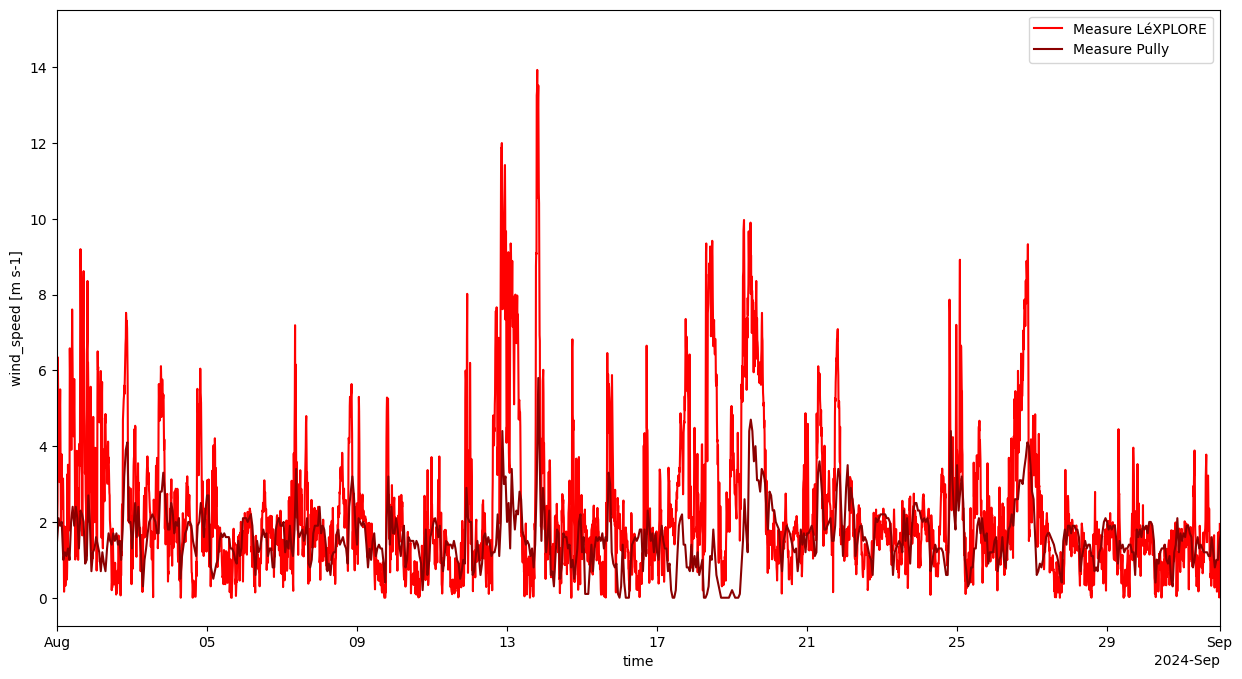

In [79]:
# Léxplore
start_plot = np.datetime64('2024-08-01T00:00:00', 'ns')
end_plot = np.datetime64('2024-09-01T00:00:00', 'ns')

plt.figure(figsize=(15,8))
ds_meas['WS'].plot(label="Measure LéXPLORE", color='r')
plt.plot(puy_time, puy_ws, label='Measure Pully', color='darkred')
plt.xlim(left = start_plot, right = end_plot)
plt.legend()

## Surface pressure

In [120]:
cosmo_press_path = os.path.join(cosmo_folder, 'apressure.bin')
with open(cosmo_press_path, 'rb') as fid:
    cosmo_data_press = np.fromfile(fid, dtype='>f8')
    
cosmo_data_press = np.reshape(cosmo_data_press, (int(nt),int(ny),int(nx)))

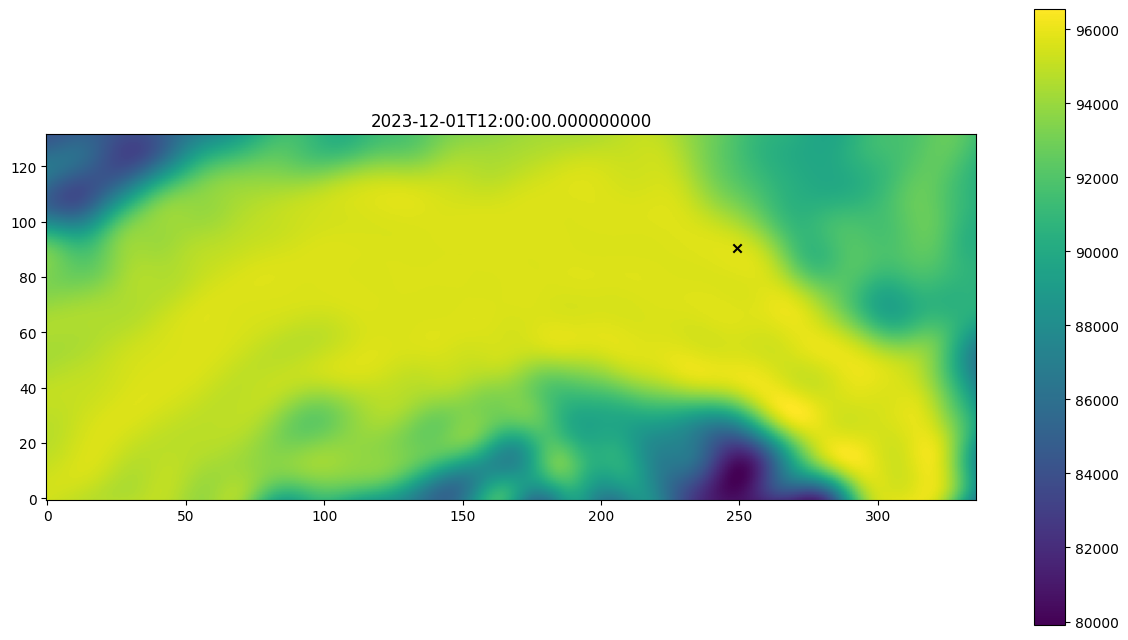

In [121]:
i_time = 12
fig = plt.figure(figsize=(15,8))
plt.scatter(m_lexplore, n_lexplore, marker='x', color='black')
plt.imshow(cosmo_data_press[i_time,:,:])
plt.gca().invert_yaxis()
plt.title(date_list[i_time])
plt.colorbar()

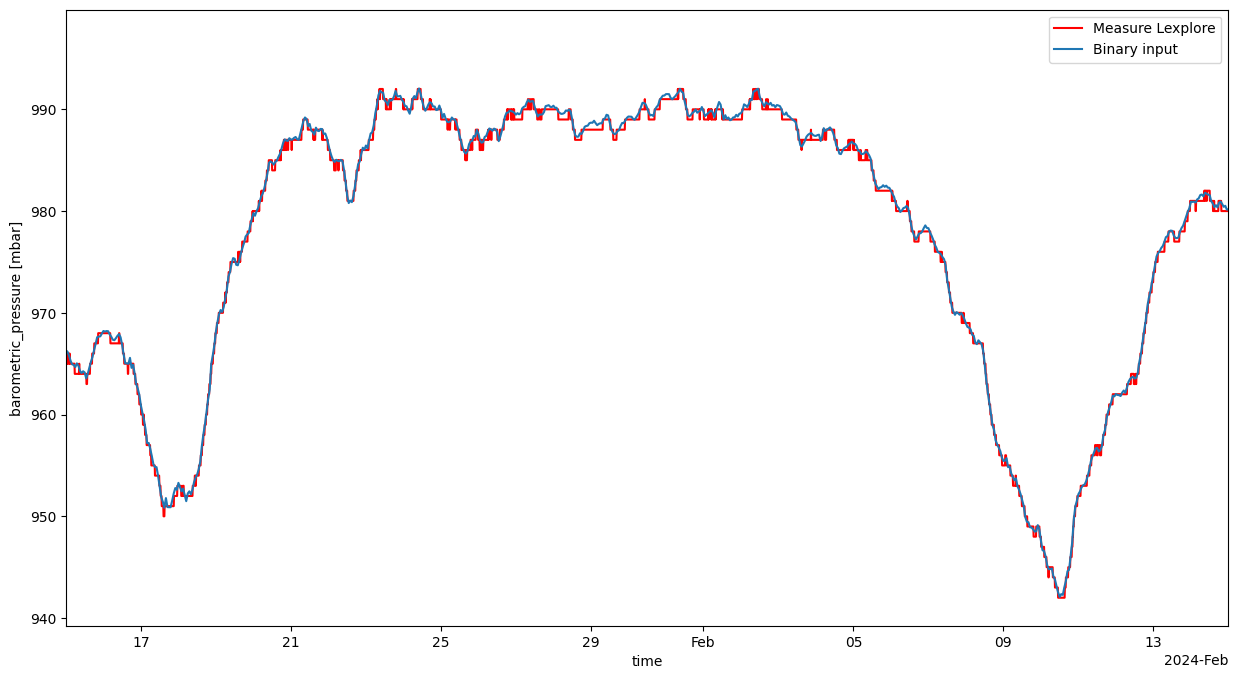

In [125]:
# Léxplore
start_plot = np.datetime64('2024-01-15T00:00:00', 'ns')
end_plot = np.datetime64('2024-02-15T00:00:00', 'ns')

plt.figure(figsize=(15,8))
ds_meas['BP'].plot(label="Measure LéXPLORE", color='r') 
plt.plot(date_list, cosmo_data_press[:,int(n_lexplore), int(m_lexplore)] / 100, label='Cosmo LéXPLORE') # 1 mbar = 100 pascals (Pa)
plt.xlim(left = start_plot, right = end_plot)
plt.legend()

In [119]:
ds_meas

<xarray.Dataset> Size: 3MB
Dimensions:        (time: 17716)
Coordinates:
  * time           (time) datetime64[ns] 142kB 2023-11-27 ... 2024-04-07T19:5...
Data variables: (12/23)
    Batt           (time) float64 142kB dask.array<chunksize=(2,), meta=np.ndarray>
    Ptemp          (time) float64 142kB dask.array<chunksize=(2,), meta=np.ndarray>
    AirTC          (time) float64 142kB dask.array<chunksize=(2,), meta=np.ndarray>
    RH             (time) float64 142kB dask.array<chunksize=(2,), meta=np.ndarray>
    Slrw           (time) float64 142kB dask.array<chunksize=(2,), meta=np.ndarray>
    Slrm           (time) float64 142kB dask.array<chunksize=(2,), meta=np.ndarray>
    ...             ...
    Slrm_qual      (time) float64 142kB dask.array<chunksize=(2,), meta=np.ndarray>
    WS_qual        (time) float64 142kB dask.array<chunksize=(2,), meta=np.ndarray>
    WindDir_qual   (time) float64 142kB dask.array<chunksize=(2,), meta=np.ndarray>
    Rain_qual      (time) float64 142kB dask.array<chunksize=(2,), meta=np.ndarray>
    BP_qual        (time) float64 142kB dask.array<chunksize=(2,), meta=np.ndarray>
    WindGust_qual  (time) float64 142kB dask.array<chunksize=(2,), meta=np.ndarray>
Attributes:
    institution:  EPFL
    source:       Lexplore Weather station Campbell CR1000
    references:   LéXPLORE commun instruments sebastien.lavanchy@epfl.ch
    history:      See history on Renku
    conventions:  CF 1.7
    comment:      Data from the Meteostation on Lexplore Platform in Lake Geneva
    title:        Lexplore Meteostation